#### We will be working on the UCI Breast Cancer Dataset : -

https://www.kaggle.com/datasets/zzero0/uci-breast-cancer-wisconsin-original

### Importing Libraries

In [145]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings


from scipy.stats import norm
from scipy.stats.mstats import trim

from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from pandas_profiling import ProfileReport

### Loading Dataset

In [146]:
df = pd.read_csv('breast_cancer.csv')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


- <b> Improving Dataset </b>

Giving column names

In [147]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Dropping "Id" Column as it is useless

In [148]:
df = df.drop(['Id'], axis =1)

### Dataset Report

In [149]:
ProfileReport(df, title='Wine Quality Dataset Report', minimal=True, progress_bar=False, samples=None,
              correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}},
              html={'style':{'primary_color': '#45658F'}},
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [150]:
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [154]:
df.loc[df['Bare_Nuclei']=='?']


,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [152]:
df = df.replace('?',0)

In [153]:
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [155]:
df.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [156]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.42,2.82,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,699.0,3.13,3.05,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,699.0,3.21,2.97,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.81,2.86,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.22,2.21,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.44,2.44,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.87,3.05,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.59,1.72,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.69,0.95,2.0,2.0,2.0,4.0,4.0


### Histogram

array([[<AxesSubplot: title={'center': 'Clump_thickness'}>,
        <AxesSubplot: title={'center': 'Uniformity_Cell_Size'}>,
        <AxesSubplot: title={'center': 'Uniformity_Cell_Shape'}>],
       [<AxesSubplot: title={'center': 'Marginal_Adhesion'}>,
        <AxesSubplot: title={'center': 'Single_Epithelial_Cell_Size'}>,
        <AxesSubplot: title={'center': 'Bland_Chromatin'}>],
       [<AxesSubplot: title={'center': 'Normal_Nucleoli'}>,
        <AxesSubplot: title={'center': 'Mitoses'}>,
        <AxesSubplot: title={'center': 'Class'}>]], dtype=object)

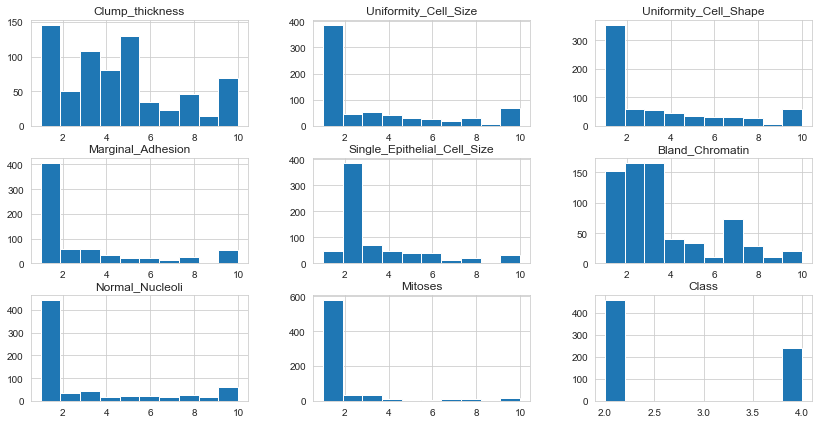

In [157]:
df.hist(figsize = (14,7))

### Correlation Matrix

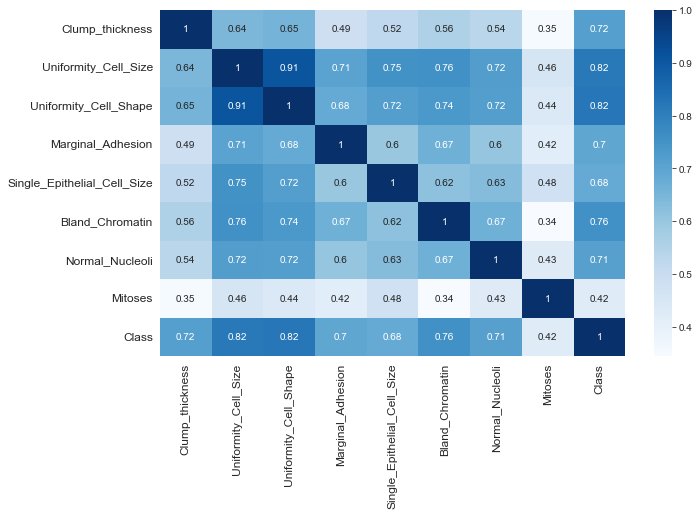

In [158]:
plt.figure(figsize=(10.5, 7.5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [159]:
df.corr()["Class"].sort_values(ascending=False)

Class                          1.000000
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

### Setting Feature vector and Target Variable

In [160]:
X = df.drop(['Class'], axis=1)
y = df["Class"]

### Split data into separate training and test set

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [174]:
X_train.shape, X_test.shape


((559, 9), (140, 9))

In [163]:
X_train.dtypes

Clump_thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
dtype: object

In [164]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [165]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

### Feature Scaling

In [166]:
cols = X_train.columns


In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [168]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [169]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [170]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.855200,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297343,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.097301,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.655158,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.655158,-0.577774,-0.283462,-0.324258


### Fitting KNN Classifier

In [182]:
X_train.shape

(559, 9)

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicting Test Set Results

In [187]:
y_pred = knn.predict(X_test)

y_pred


array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [188]:
knn.predict_proba(X_test)[:,0]


array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [189]:
knn.predict_proba(X_test)[:,1]


array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

In [193]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


In [194]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


### Checking Overfitting and Underfitting

In [196]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


No Overfitting visible

In [198]:
y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

### Rebuilding KNN with other values of K 

#### Rebuilding kNN Classification model using k=2


In [213]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train, y_train)
y_pred_2 = knn_2.predict(X_test)
print('Model accuracy score with k=2 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_2)))
      

Model accuracy score with k=2 : 0.9500


#### Rebuilding kNN Classification model using k=4


In [214]:
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, y_train)
y_pred_4 = knn_4.predict(X_test)
print('Model accuracy score with k=4 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_4)))

Model accuracy score with k=4 : 0.9643


#### Rebuilding kNN Classification model using k=5


In [218]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


#### Rebuilding kNN Classification model using k=6


In [220]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
y_pred_6 = knn_6.predict(X_test)
print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9786


#### Rebuilding kNN Classification model using k=7


In [226]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


#### Rebuilding kNN Classification model using k=8

In [229]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
y_pred_8 = knn_8.predict(X_test)
print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


#### Rebuilding kNN Classification model using k=9

In [228]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)
y_pred_9 = knn_9.predict(X_test)
print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9714


<br><br><br>Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.

With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement.

If we increase k to 9, then accuracy decreases again to 0.9714.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

### Confusion Matrix

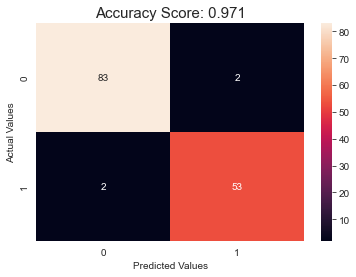

In [235]:
pred = knn.predict(X_test)
score = round(accuracy_score(y_test,pred),3)
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [238]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

print("(Total) True Negative    :", TN)
print("(Total) True Positive    :", TP)
print("(Total) False Positive   :", FP)
print("(Total) False Negative   :", FN)

(Total) True Negative    : 83
(Total) True Positive    : 53
(Total) False Positive   : 2
(Total) False Negative   : 2


### Accuracy score
- <b> Accuracy = (TP + TN) / (TP + TN + FP + FN) </b>

In [249]:
accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Accuracy Score of Our Model     : {0:0.4f} ".format(accuracy))

Accuracy Score of Our Model     : 0.9714 


### Error Rate


In [250]:
error_rate = 1 - accuracy
print("Error Rate of Our Model     : ", error_rate)

Error Rate of Our Model     :  0.02857142857142858


### Precision

- <b> Precision = TP/(TP+FP) </b>

In [252]:
precision = TP/float(TP+FP)
print("Accuracy Score of Our Model     : {0:0.4f} ".format(precision))

Accuracy Score of Our Model     : 0.9636 


### Recall 
- <b> Recall = TP/(TP+FN) </b>


In [255]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9636


### Specificity 
- <b> Specificity = TN/(TN+FP) </b>

In [256]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9765


In [261]:
### Classification Report

from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,y_pred_7))

print("Accuracy Score of Our Model     : ",  accuracy)
print("Error Rate of Our Model         : ", error_rate)

print("Precision                       : ", precision_score(y_test, y_pred_7, average='micro' ))
print("Recall                          : ",  recall_score(y_test, y_pred_7, average='micro'))
print("Specificity                     : ",  (TN)/(TN + FP)) 



              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

Accuracy Score of Our Model     :  0.9714285714285714
Error Rate of Our Model         :  0.02857142857142858
Precision                       :  0.9785714285714285
Recall                          :  0.9785714285714285
Specificity                     :  0.9764705882352941


ROC AUC : 0.9791


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

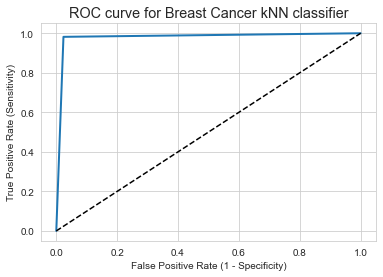

In [265]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_7)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_7, pos_label=4)


plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

In [266]:

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9912


Our Cross Validated ROC AUC is very close to 1. So, we can conclude that, the KNN classifier is indeed a very good model.

### k-fold Cross Validation

In [278]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy').mean()

print('Average Cross-validation score : {0:0.4f}'.format(scores))

Average Cross-validation score : 0.9643


Using the mean cross-validation, we can conclude that we expect the model to be around 96.43 % accurate on average.



We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.